Import Libraries and Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For interactive visualization (optional)
# import plotly.express as px

# Load cleaned data for general exploration
cleaned_path = 'D:\Portfolio\waste_management\data\processed\waste_data_cleaned.csv'
df_clean = pd.read_csv(cleaned_path)

# Load encoded processed data for modeling-related EDA
processed_path = 'D:\Portfolio\waste_management\data\processed\waste_data_processed.csv'
df_processed = pd.read_csv(processed_path)

print(f"Cleaned data shape: {df_clean.shape}")
print(f"Processed data shape: {df_processed.shape}")

df_clean.head()


<>:10: SyntaxWarning: invalid escape sequence '\P'
<>:14: SyntaxWarning: invalid escape sequence '\P'
<>:10: SyntaxWarning: invalid escape sequence '\P'
<>:14: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11028\4219354363.py:10: SyntaxWarning: invalid escape sequence '\P'
  cleaned_path = 'D:\Portfolio\waste_management\data\processed\waste_data_cleaned.csv'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11028\4219354363.py:14: SyntaxWarning: invalid escape sequence '\P'
  processed_path = 'D:\Portfolio\waste_management\data\processed\waste_data_processed.csv'


Cleaned data shape: (850, 17)
Processed data shape: (850, 86)


,City/District,Waste Type,Waste Generated (Tons/Day),Recycling Rate (%),Population Density (People/km²),Municipal Efficiency Score (1-10),Disposal Method,Cost of Waste Management (₹/Ton),Awareness Campaigns Count,Landfill Name,Landfill Capacity (Tons),Year,Landfill_Lat,Landfill_Long,Waste_Per_Capita_kg,Landfill_Utilization_Ratio,Cost_Per_Campaign
0,Mumbai,Plastic,6610,68,11191,9,Composting,3056,14,Mumbai Landfill,45575,2019,22.4265,77.4931,590.653203,0.145036,218.285714
1,Mumbai,Organic,1181,56,11191,5,Composting,2778,12,Mumbai Landfill,45575,2019,22.4265,77.4931,105.531230,0.025913,231.500000
2,Mumbai,E-Waste,8162,53,11191,8,Incineration,3390,13,Mumbai Landfill,45575,2019,22.4265,77.4931,729.336074,0.179089,260.769231
3,Mumbai,Construction,8929,56,11191,5,Landfill,1498,14,Mumbai Landfill,45575,2019,22.4265,77.4931,797.873291,0.195919,107.000000
4,Mumbai,Hazardous,5032,44,11191,7,Recycling,2221,16,Mumbai Landfill,45575,2019,22.4265,77.4931,449.647038,0.110411,138.812500


Summary Statistics and Distributions

                                   count          mean           std  \
Waste Generated (Tons/Day)         850.0   5262.249412   2786.984735   
Recycling Rate (%)                 850.0     57.076471     16.129994   
Population Density (People/km²)    850.0  13489.705882   6631.081494   
Municipal Efficiency Score (1-10)  850.0      7.400000      1.722162   
Cost of Waste Management (₹/Ton)   850.0   2778.458824   1276.325630   
Awareness Campaigns Count          850.0      9.904706      6.070772   
Landfill Capacity (Tons)           850.0  58934.617647  19413.627292   
Year                               850.0   2021.000000      1.415046   
Landfill_Lat                       850.0     21.671862      8.754971   
Landfill_Long                      850.0     83.638241      7.745195   
Waste_Per_Capita_kg                850.0    605.405644    695.531262   
Landfill_Utilization_Ratio         850.0      0.101483      0.070404   
Cost_Per_Campaign                  802.0    507.066516    732.58

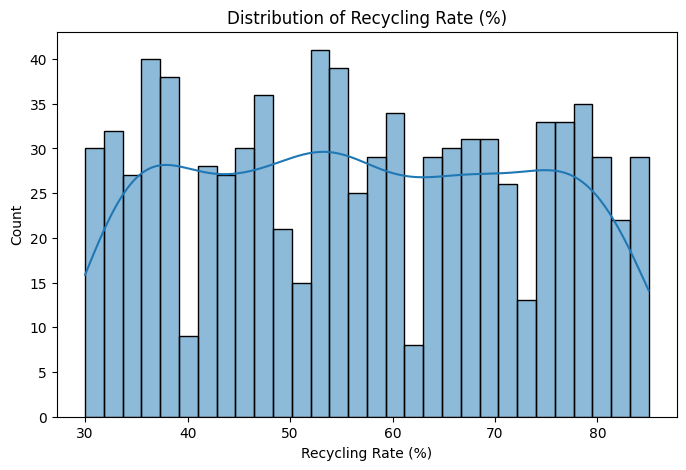

In [3]:
# Summary statistics (numerical data)
print(df_clean.describe().T)

# Distribution of target variable: Recycling Rate (%)
plt.figure(figsize=(8,5))
sns.histplot(df_clean['Recycling Rate (%)'], bins=30, kde=True)
plt.title('Distribution of Recycling Rate (%)')
plt.xlabel('Recycling Rate (%)')
plt.ylabel('Count')
plt.show()


Missing Values and Correlations

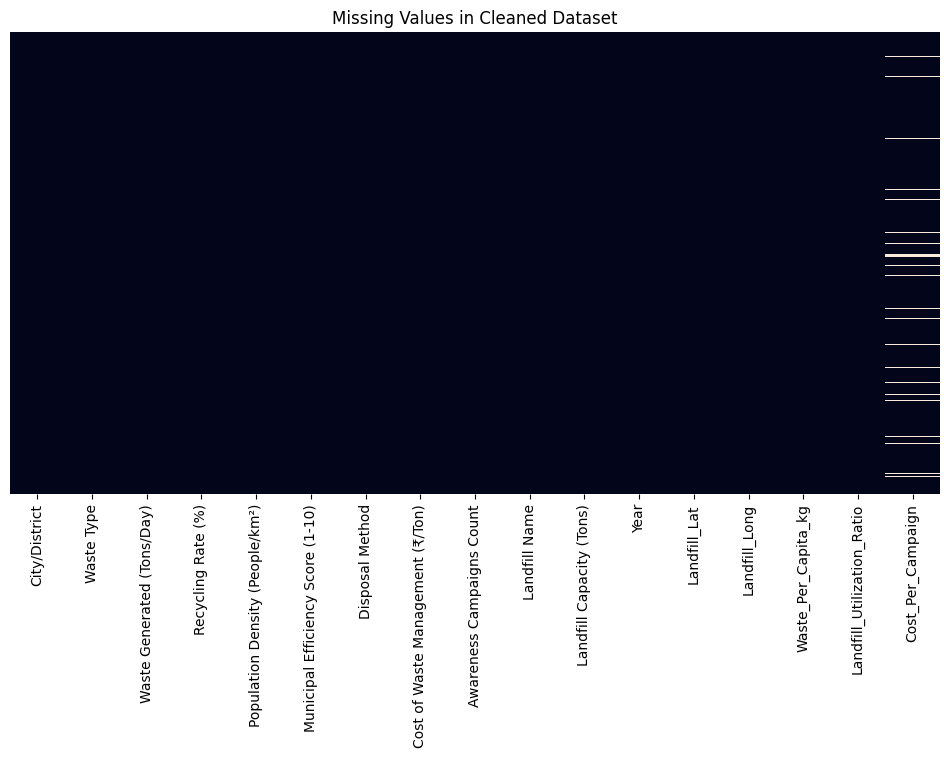

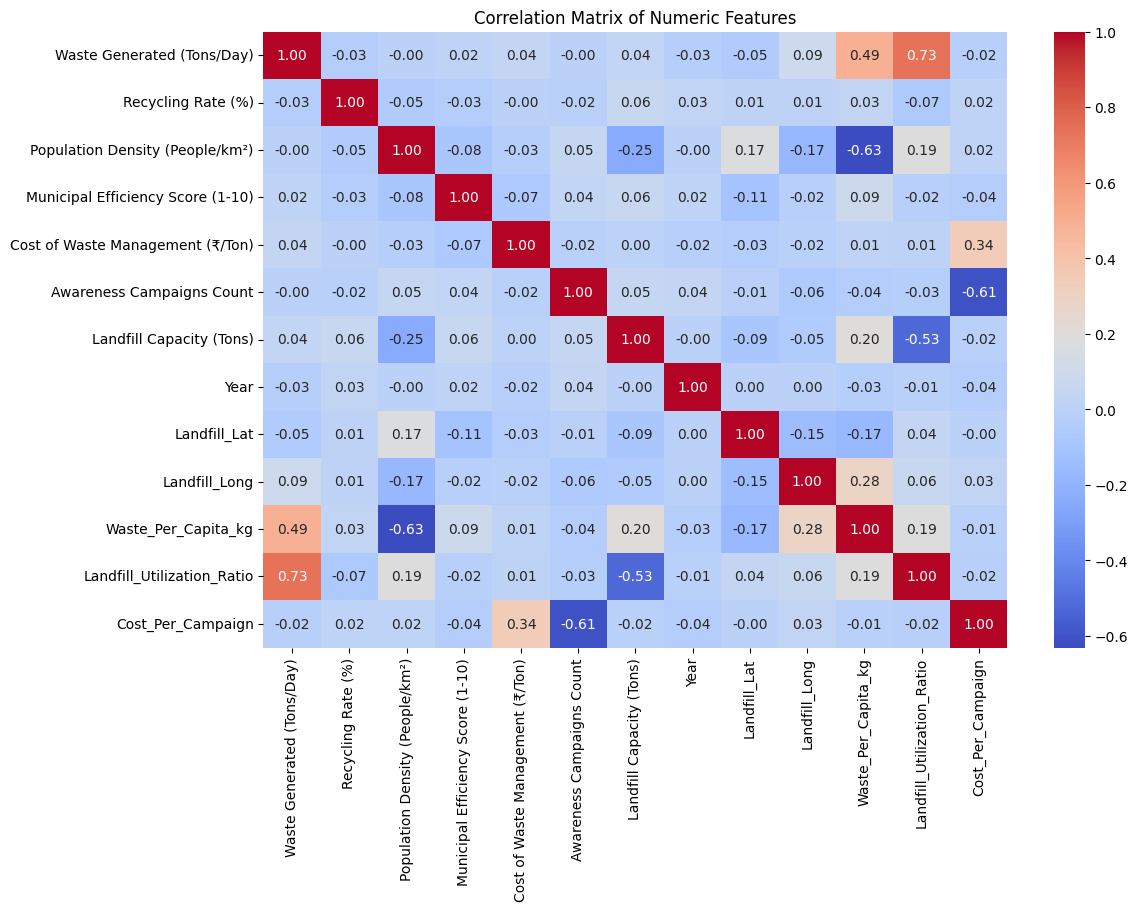

In [5]:
# Missing values heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df_clean.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Values in Cleaned Dataset')
plt.show()

# Correlation heatmap for numeric features
plt.figure(figsize=(12,8))
num_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
corr = df_clean[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


Relationship Between Key Numerical Features and Recycling Rate

In [17]:
print(df_clean.columns.tolist())


df_clean.rename(columns={
    'Population Density (People/kmÂ²)': 'Population Density (People/km²)',
    'Cost of Waste Management (â‚¹/Ton)': 'Cost of Waste Management (₹/Ton)'
}, inplace=True)


['City/District', 'Waste Type', 'Waste Generated (Tons/Day)', 'Recycling Rate (%)', 'Population Density (People/km²)', 'Municipal Efficiency Score (1-10)', 'Disposal Method', 'Cost of Waste Management (₹/Ton)', 'Awareness Campaigns Count', 'Landfill Name', 'Landfill Capacity (Tons)', 'Year', 'Landfill_Lat', 'Landfill_Long', 'Waste_Per_Capita_kg', 'Landfill_Utilization_Ratio', 'Cost_Per_Campaign']


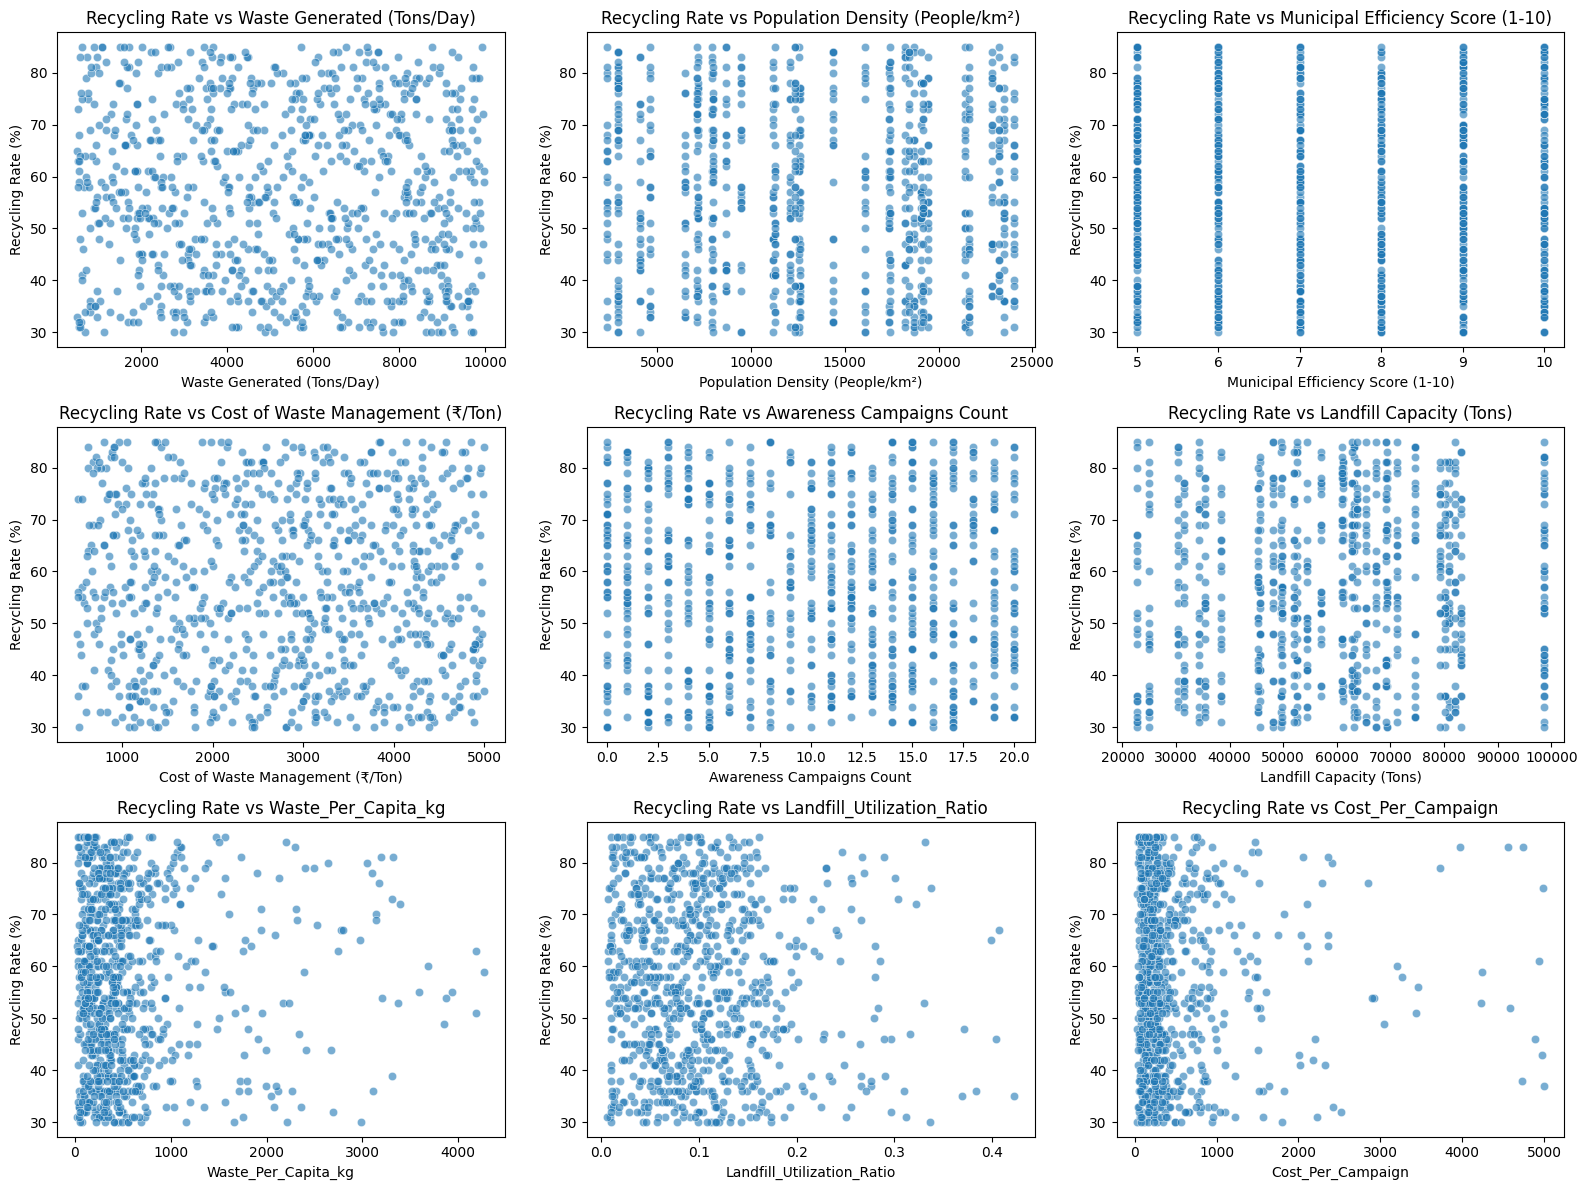

In [19]:
features_to_plot = [
    'Waste Generated (Tons/Day)', 'Population Density (People/km²)', 
    'Municipal Efficiency Score (1-10)', 'Cost of Waste Management (₹/Ton)', 
    'Awareness Campaigns Count', 'Landfill Capacity (Tons)', 
    'Waste_Per_Capita_kg', 'Landfill_Utilization_Ratio', 'Cost_Per_Campaign'
]

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df_clean, x=feature, y='Recycling Rate (%)', alpha=0.6)
    plt.title(f'Recycling Rate vs {feature}')
plt.tight_layout()
plt.show()


Boxplots for Categorical Features vs Recycling Rate

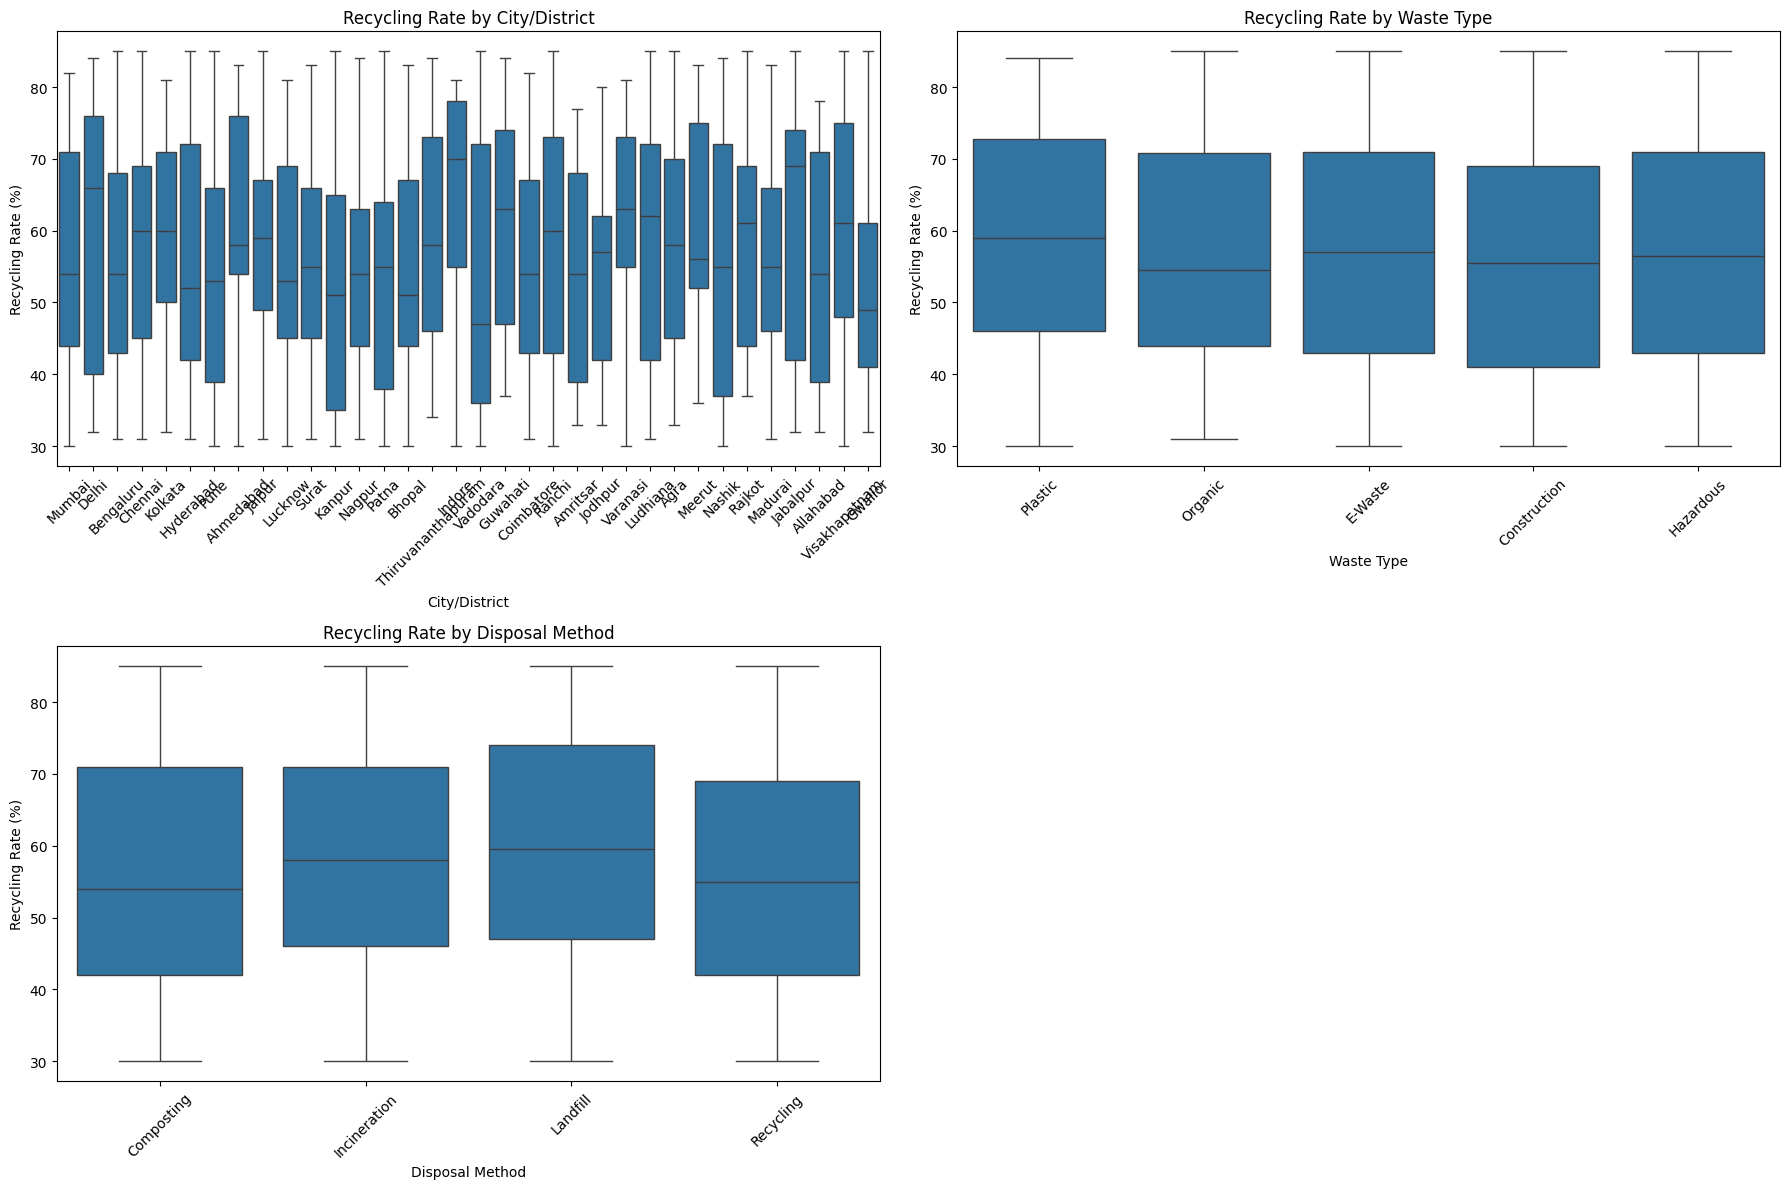

In [7]:
categorical_cols = ['City/District', 'Waste Type', 'Disposal Method']

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_clean, x=col, y='Recycling Rate (%)')
    plt.xticks(rotation=45)
    plt.title(f'Recycling Rate by {col}')
plt.tight_layout()
plt.show()


Yearly Trend of Recycling Rate

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11028\2053714556.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))


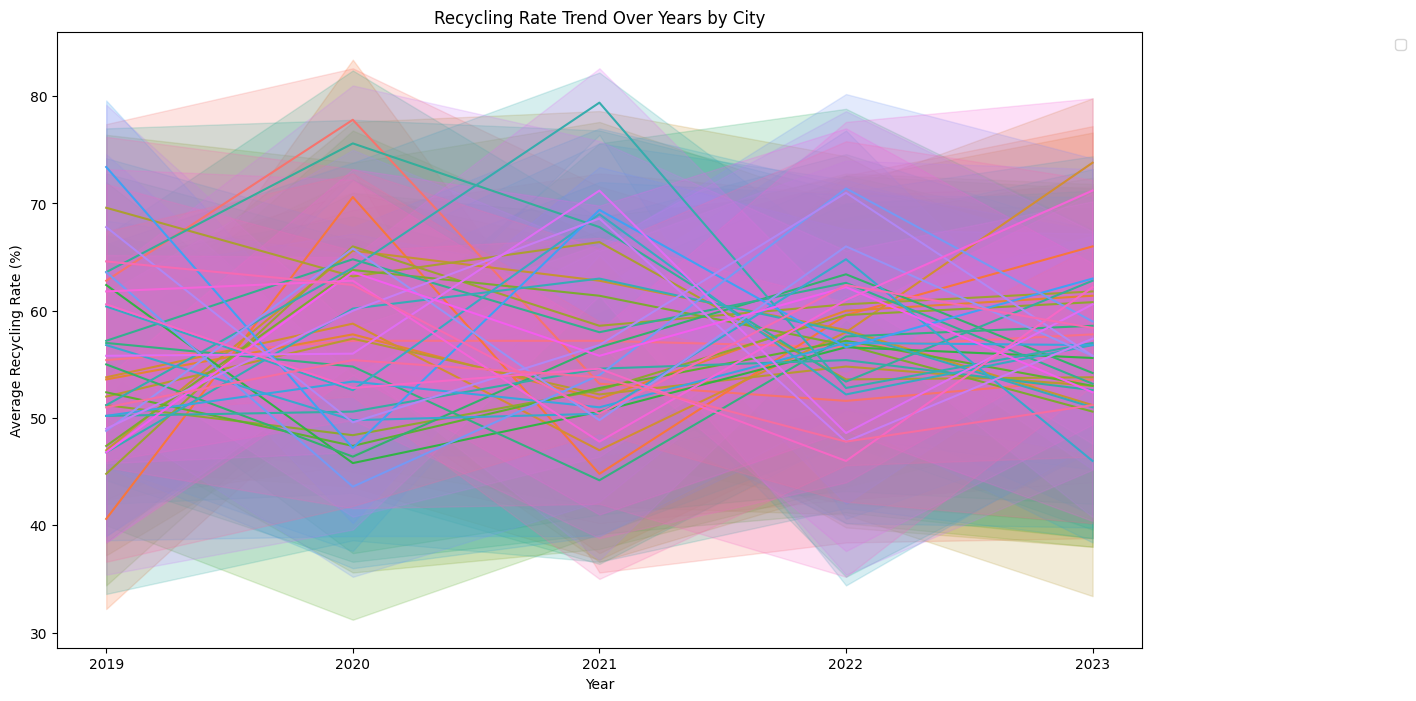

In [8]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df_clean, x='Year', y='Recycling Rate (%)', hue='City/District', legend=None)
plt.title('Recycling Rate Trend Over Years by City')
plt.ylabel('Average Recycling Rate (%)')
plt.xticks(df_clean['Year'].unique())
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11028\2053714556.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))


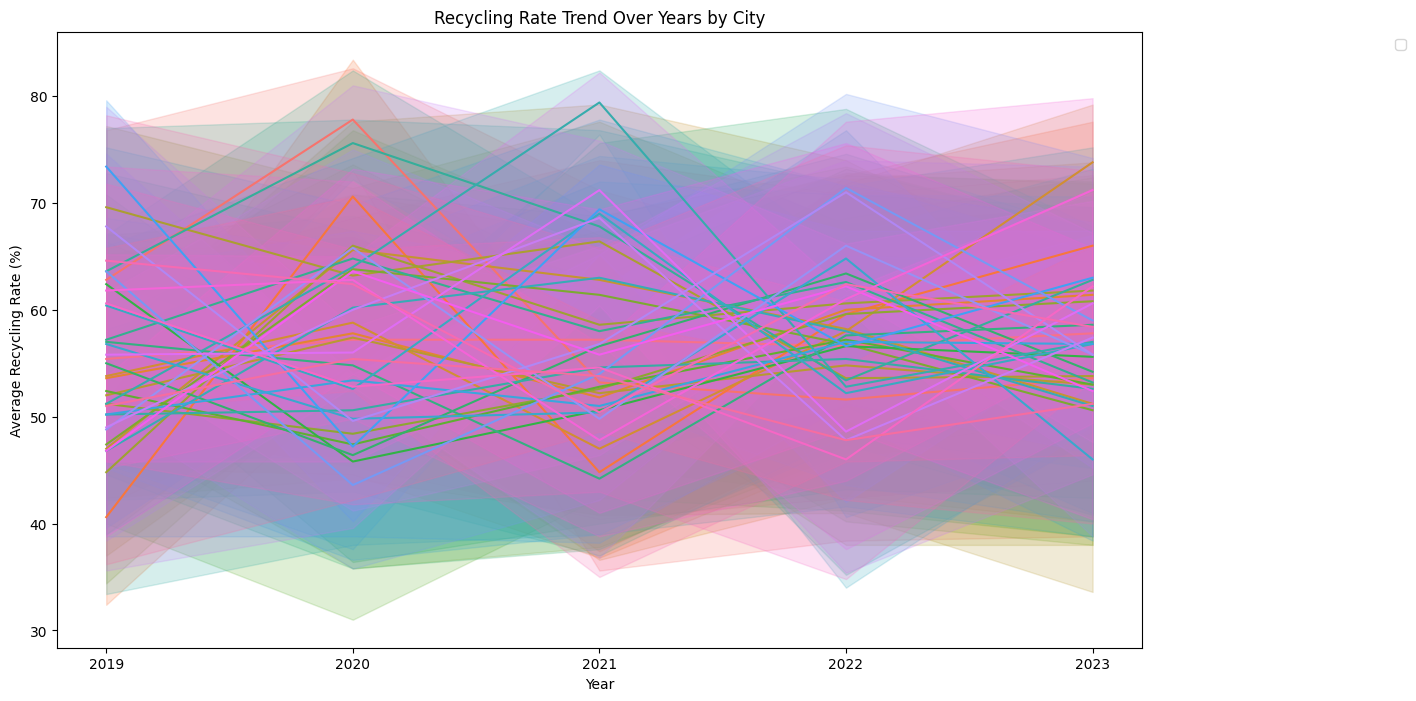

In [11]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df_clean, x='Year', y='Recycling Rate (%)', hue='City/District', legend=None)
plt.title('Recycling Rate Trend Over Years by City')
plt.ylabel('Average Recycling Rate (%)')
plt.xticks(df_clean['Year'].unique())
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


Municipal Efficiency vs Recycling Rate

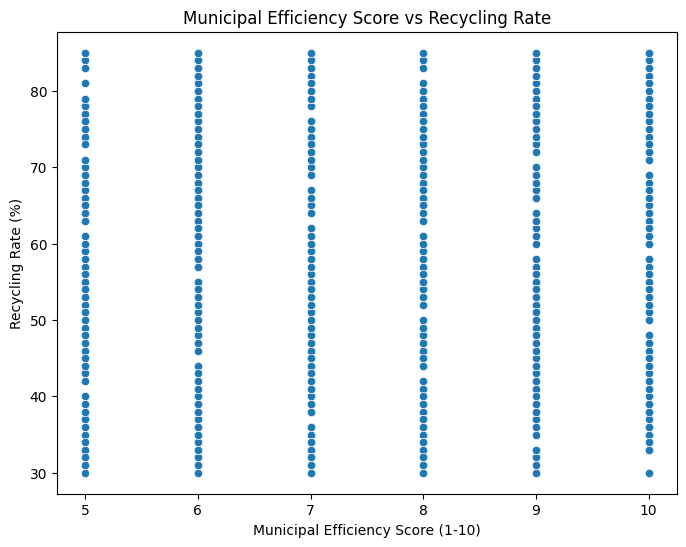

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='Municipal Efficiency Score (1-10)', y='Recycling Rate (%)')
plt.title('Municipal Efficiency Score vs Recycling Rate')
plt.show()


Distribution of Waste Types and Disposal Methods

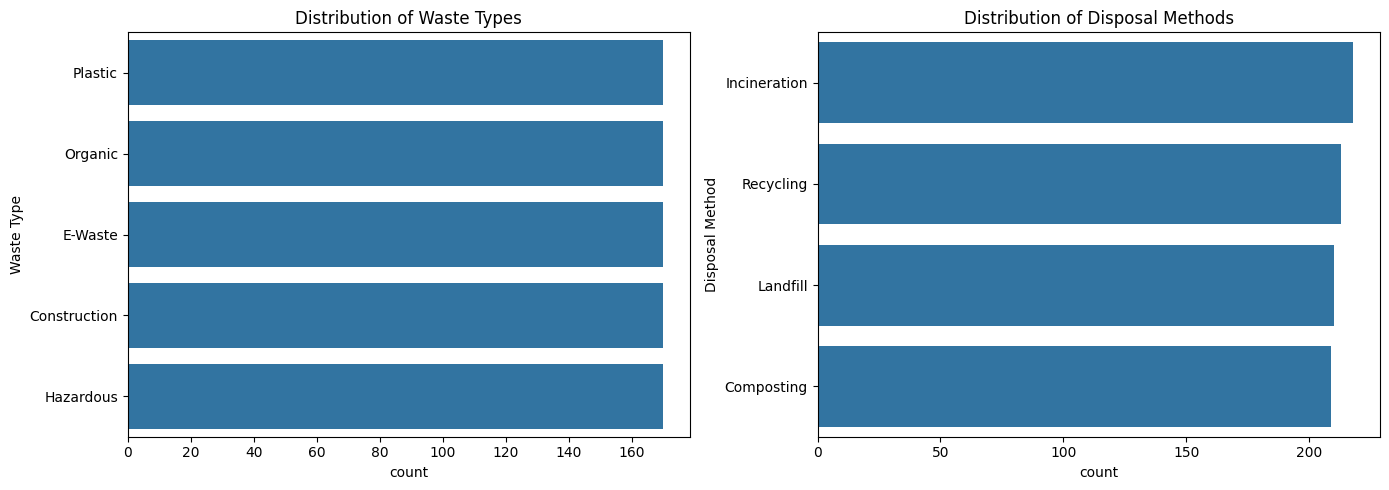

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.countplot(data=df_clean, y='Waste Type', order=df_clean['Waste Type'].value_counts().index, ax=axes[0])
axes[0].set_title('Distribution of Waste Types')

sns.countplot(data=df_clean, y='Disposal Method', order=df_clean['Disposal Method'].value_counts().index, ax=axes[1])
axes[1].set_title('Distribution of Disposal Methods')

plt.tight_layout()
plt.show()


In [12]:
print(df_clean.columns.tolist())


['City/District', 'Waste Type', 'Waste Generated (Tons/Day)', 'Recycling Rate (%)', 'Population Density (People/km²)', 'Municipal Efficiency Score (1-10)', 'Disposal Method', 'Cost of Waste Management (₹/Ton)', 'Awareness Campaigns Count', 'Landfill Name', 'Landfill Capacity (Tons)', 'Year', 'Landfill_Lat', 'Landfill_Long', 'Waste_Per_Capita_kg', 'Landfill_Utilization_Ratio', 'Cost_Per_Campaign']


In [13]:
df_clean.rename(columns={
    'Population Density (People/kmÂ²)': 'Population Density (People/km²)',
    'Cost of Waste Management (â‚¹/Ton)': 'Cost of Waste Management (₹/Ton)'
}, inplace=True)


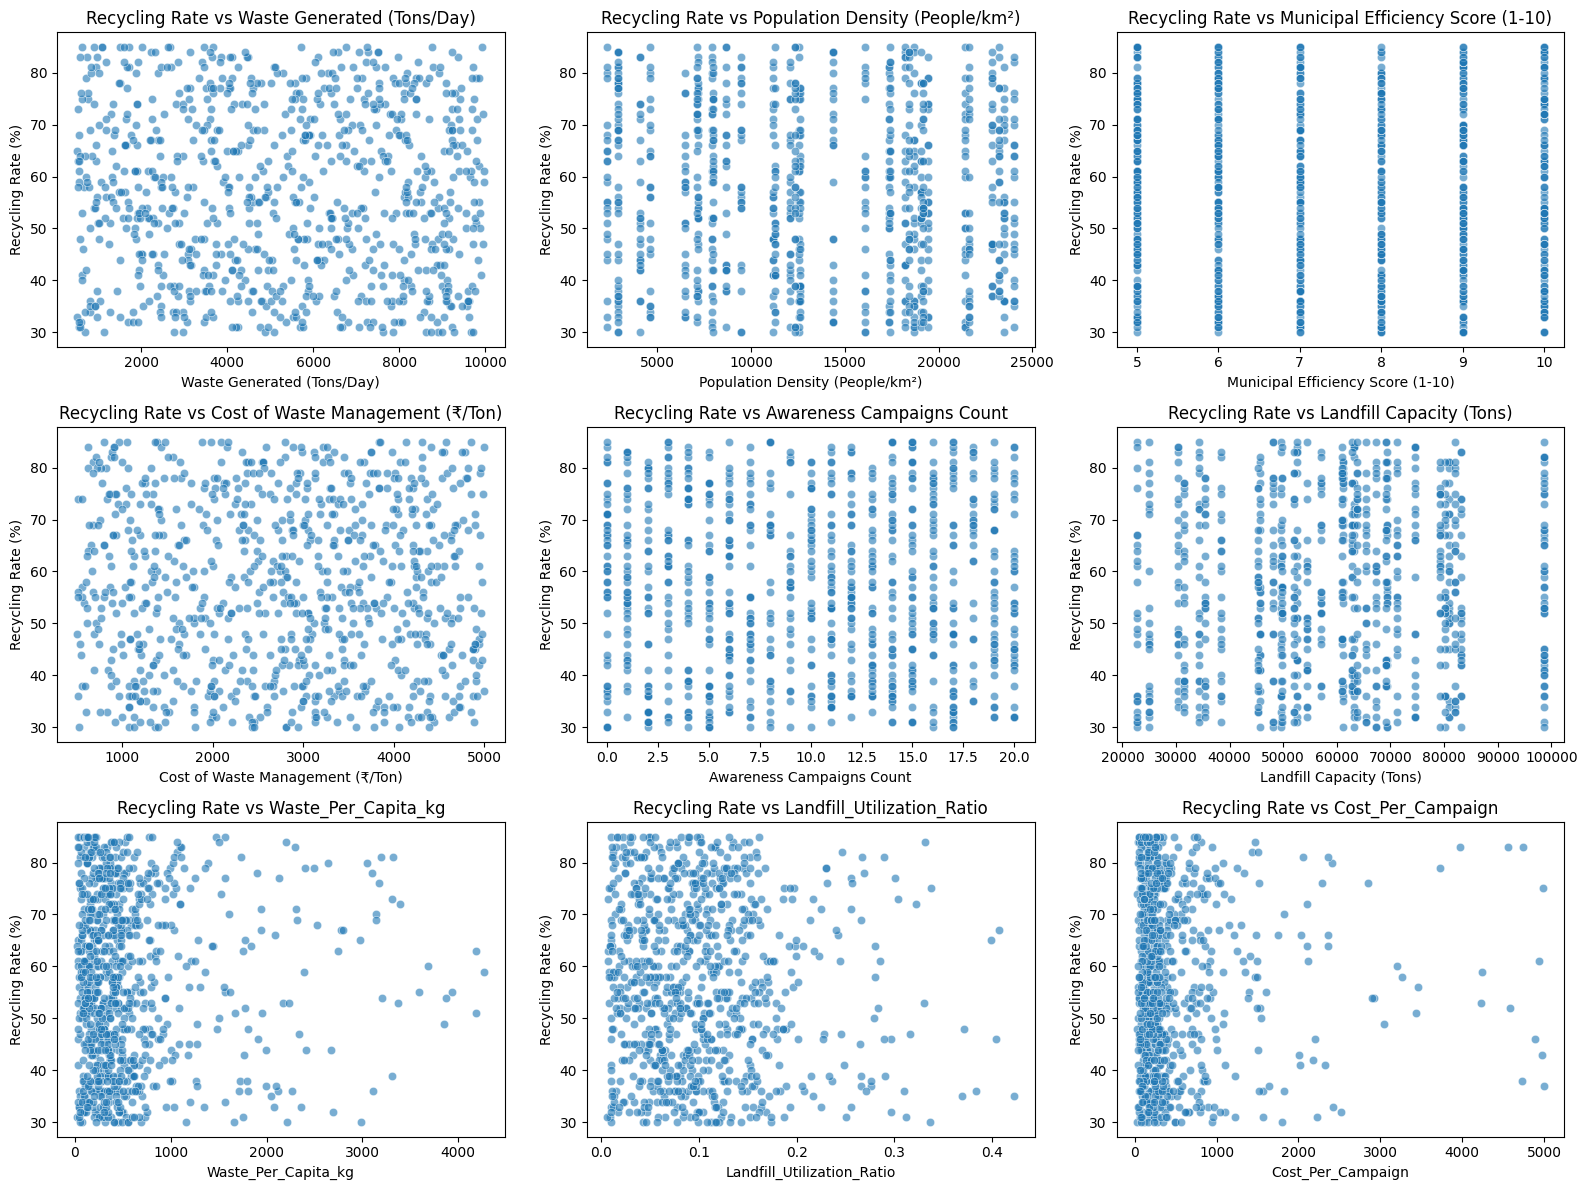